# Т-2

## В таблице приведены данные о содержании иммуноглобулина Ig A в сыворотке крови у больных пяти возрастных групп

![Таблица к Т-2](tabl.jpg)

### а) Определить влияние возраста на содержание иммуноглобулина в крови с помощью регрессионного анализа

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats

    Группа  IgA
0        1   83
1        1   85
2        2   84
3        2   85
4        2   85
5        2   86
6        2   86
7        2   87
8        3   86
9        3   87
10       3   87
11       3   87
12       3   88
13       3   88
14       3   88
15       3   88
16       3   89
17       3   90
18       4   89
19       4   90
20       4   90
21       4   91
22       5   90
23       5   92


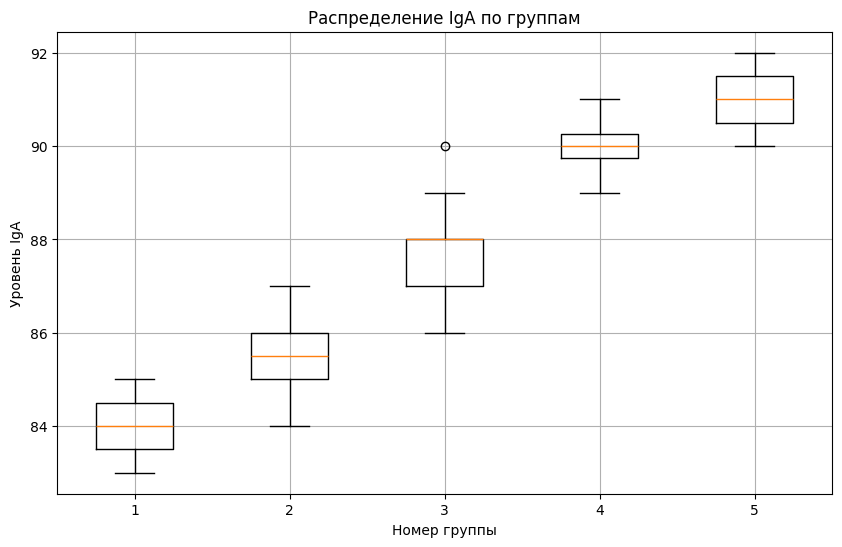


=== Регрессионный анализ ===
                            OLS Regression Results                            
Dep. Variable:                    IgA   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     85.92
Date:                Mon, 05 May 2025   Prob (F-statistic):           4.71e-09
Time:                        03:36:33   Log-Likelihood:                -34.478
No. Observations:                  24   AIC:                             72.96
Df Residuals:                      22   BIC:                             75.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.8871 

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

# 1. Подготовка данных - создаем DataFrame из словаря
data = {
    'Группа1': [83, 85],
    'Группа2': [84, 85, 85, 86, 86, 87],
    'Группа3': [86, 87, 87, 87, 88, 88, 88, 88, 89, 90],
    'Группа4': [89, 90, 90, 91],
    'Группа5': [90, 92]
}

# Преобразуем в удобный формат для анализа
df_list = []
for group_name, values in data.items():
    group_num = int(group_name.replace('Группа', ''))
    for value in values:
        df_list.append({'Группа': group_num, 'IgA': value})
        
df = pd.DataFrame(df_list)

# print(df)

# 2. Визуализация данных - боксплот
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Группа']==i]['IgA'] for i in range(1, 6)], labels=range(1, 6))
plt.title('Распределение IgA по группам')
plt.xlabel('Номер группы')
plt.ylabel('Уровень IgA')
plt.grid()
plt.show()

# 3. Регрессионный анализ
print('\n=== Регрессионный анализ ===')
X = sm.add_constant(df['Группа'])  # Добавляем константу
model = sm.OLS(df['IgA'], X).fit()
print(model.summary())

# Выводим уравнение в понятном виде
intercept = round(model.params['const'], 2)
coef = round(model.params['Группа'], 2)
print(f'\nУравнение регрессии: IgA = {intercept} + {coef}*Группа')

# 4. Попарные сравнения с поправкой Бонферрони
print('\n=== Попарные сравнения ===')

# Все возможные пары групп
groups = df['Группа'].unique()
pairs = [(i, j) for i in groups for j in groups if i < j]
print(f'Всего пар для сравнения: {len(pairs)}')

# Корректируем уровень значимости
alpha = 0.05
bonferroni_alpha = alpha / len(pairs)
print(f'Скорректированный уровень значимости: {bonferroni_alpha:.4f}')

# Проводим попарные t-тесты
results = []
for g1, g2 in pairs:
    data1 = df[df['Группа']==g1]['IgA']
    data2 = df[df['Группа']==g2]['IgA']
    
    # Тест Уэлча (не предполагаем равенство дисперсий)
    t_stat, p_val = stats.ttest_ind(data1, data2, equal_var=False)
    
    # Определяем значимость
    significant = 'Да' if p_val < bonferroni_alpha else 'Нет'
    
    results.append({
        'Группа 1': g1,
        'Группа 2': g2,
        'Среднее 1': round(data1.mean(), 2),
        'Среднее 2': round(data2.mean(), 2),
        'Разница': round(data2.mean() - data1.mean(), 2),
        'p-value': round(p_val, 4),
        'Значимо': significant
    })

# Выводим красиво в таблице
results_df = pd.DataFrame(results)
print('\nРезультаты попарных сравнений:')
print(results_df.to_string(index=False))

# 5. Дополнительный анализ - ANOVA
print('\n=== Дополнительная проверка ANOVA ===')
f_stat, p_val = stats.f_oneway(
    df[df['Группа']==1]['IgA'],
    df[df['Группа']==2]['IgA'],
    df[df['Группа']==3]['IgA'],
    df[df['Группа']==4]['IgA'],
    df[df['Группа']==5]['IgA']
)
print(f'F-статистика: {f_stat:.2f}, p-value: {p_val:.4f}')

if p_val < 0.05:
    print('Есть статистически значимые различия между группами (ANOVA)')
else:
    print('Нет значимых различий между группами (ANOVA)')